In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Clean the missing values

In [15]:
df = pd.read_csv('price_data(Price).csv')
df['day'] = pd.to_datetime(df['day'])
df = df.drop(['blank', 'HFC', 'FLIR', 'HON', 'SRCL'], axis=1) # Drop a blank colums and stocks missing at least 100 values
# Each stock has at most 2 missing values

"""drops = {}
for col in df.columns:
    df_temp = df[col].dropna()
    drops[col] = len(df_temp)
max_col = min(drops, key=drops.get)
print(f"Column: {max_col}, Non-NaN count: {drops[max_col]}")"""

#Use linear interpolation to fill in missing values
df = df.interpolate(method='linear')

df.dropna(inplace=True) # Drops the first empty row
df.reset_index(drop=True, inplace=True)
print(df.head())

         day    VIX    AAPL    MSFT    AMZN    NVDA   GOOGL    META    TSLA  \
0 2025-05-23  22.29  195.27  450.18  200.99  131.29  168.47  627.06  339.34   
1 2025-05-22  20.28  201.36  454.86  203.10  132.83  170.87  636.57  341.04   
2 2025-05-21  20.87  202.09  452.57  201.12  131.80  168.56  635.50  334.62   
3 2025-05-20  18.09  206.86  458.17  204.07  134.38  163.98  637.10  343.82   
4 2025-05-19  18.14  208.78  458.87  206.16  135.57  166.54  640.43  342.09   

      UNH  ...    IFF   ILMN    INCY  INTC.1  INTU.1     IP    IPG     IR  \
0  295.57  ...  75.00  80.37  64.245   20.05  720.13  47.67  24.00  80.38   
1  296.67  ...  75.72  80.54  64.510   20.55  666.07  48.63  24.06  81.20   
2  302.98  ...  77.07  79.37  64.780   20.69  659.98  48.66  24.28  81.19   
3  321.58  ...  77.88  84.21  65.300   21.27  671.16  50.01  25.21  82.92   
4  315.89  ...  77.34  82.95  63.810   21.38  670.86  50.49  25.46  83.55   

      IRM  ISRG.1  
0   96.21  539.54  
1   95.80  542.67  
2 

## Format the data for the algo

In [16]:
vol_data = df['VIX'] * 2 / 100
print(vol_data.head())

date_data = df['day']
print(date_data.head())

price_data = df.drop(columns=['day', 'VIX'])
print(price_data.head())

expected_returns_data = pd.DataFrame(0.08, index = price_data.index, columns = ['expected_return'])['expected_return']
print(expected_returns_data.head())

0    0.4458
1    0.4056
2    0.4174
3    0.3618
4    0.3628
Name: VIX, dtype: float64
0   2025-05-23
1   2025-05-22
2   2025-05-21
3   2025-05-20
4   2025-05-19
Name: day, dtype: datetime64[ns]
     AAPL    MSFT    AMZN    NVDA   GOOGL    META    TSLA     UNH     JNJ  \
0  195.27  450.18  200.99  131.29  168.47  627.06  339.34  295.57  152.94   
1  201.36  454.86  203.10  132.83  170.87  636.57  341.04  296.67  152.61   
2  202.09  452.57  201.12  131.80  168.56  635.50  334.62  302.98  153.18   
3  206.86  458.17  204.07  134.38  163.98  637.10  343.82  321.58  153.66   
4  208.78  458.87  206.16  135.57  166.54  640.43  342.09  315.89  152.49   

      JPM  ...    IFF   ILMN    INCY  INTC.1  INTU.1     IP    IPG     IR  \
0  260.71  ...  75.00  80.37  64.245   20.05  720.13  47.67  24.00  80.38   
1  260.67  ...  75.72  80.54  64.510   20.55  666.07  48.63  24.06  81.20   
2  261.04  ...  77.07  79.37  64.780   20.69  659.98  48.66  24.28  81.19   
3  265.68  ...  77.88  84.21  65.30

In [ ]:
from simulate_returns import compute_returns

returns_data = compute_returns(
    price_data, 
    vol_data,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option = compute_returns(
    price_data, 
    vol_data,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)

In [ ]:
print(returns_data[-50:])

[np.float64(-0.0023686090720422453), np.float64(-0.0014871081071146266), np.float64(0.0020776442698133275), np.float64(-0.008427456492105965), np.float64(-0.0010231426894723346), np.float64(-0.002287592727792836), np.float64(8.29394173219363e-06), np.float64(-0.010145855549972573), np.float64(0.0004109862992634706), np.float64(-0.0067423269869358775), np.float64(0.0008589796250772196), np.float64(0.006270755100162534), np.float64(-0.009190690858135824), np.float64(0.0011241825410527586), np.float64(-0.005537278258952594), np.float64(-0.008303917606966853), np.float64(0.0016302215223116083), np.float64(-0.002589739594927635), np.float64(-0.014199465535204209), np.float64(0.011901998372548878), np.float64(-0.0044295378142304755), np.float64(-0.0007736960042865343), np.float64(-0.0022850818704685813), np.float64(0.00032655720584347296), np.float64(-0.009214858495943464), np.float64(-0.004310016562577141), np.float64(-0.012260951544573663), np.float64(-0.015280043485279862), np.float64(-0.

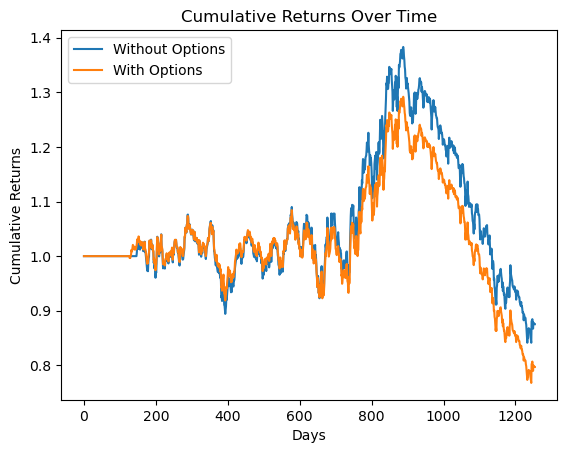

In [ ]:
x  = []
y = []
z = []
res = 1
res2 = 1
for i in range(len(returns_data)):
    x.append(i)
    res = res * (1 + returns_data[i])
    y.append(res)
    res2 = res2 * (1 + returns_data_option[i])
    z.append(res2)

plt.plot(x,y, label='Without Options')
plt.plot(x,z, label='With Options')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()

plt.show()